In [32]:
from optical_flow import *
from utils import *

In [33]:
directory = 'MPI-Sintel_selection/training/clean/temple_3'
frames = read_frames(directory)
print(f"Read {len(frames)} frames")

flow_directory = 'MPI-Sintel_selection/training/flow/temple_3'
gt_flows = read_flows(flow_directory)

Read 50 frames


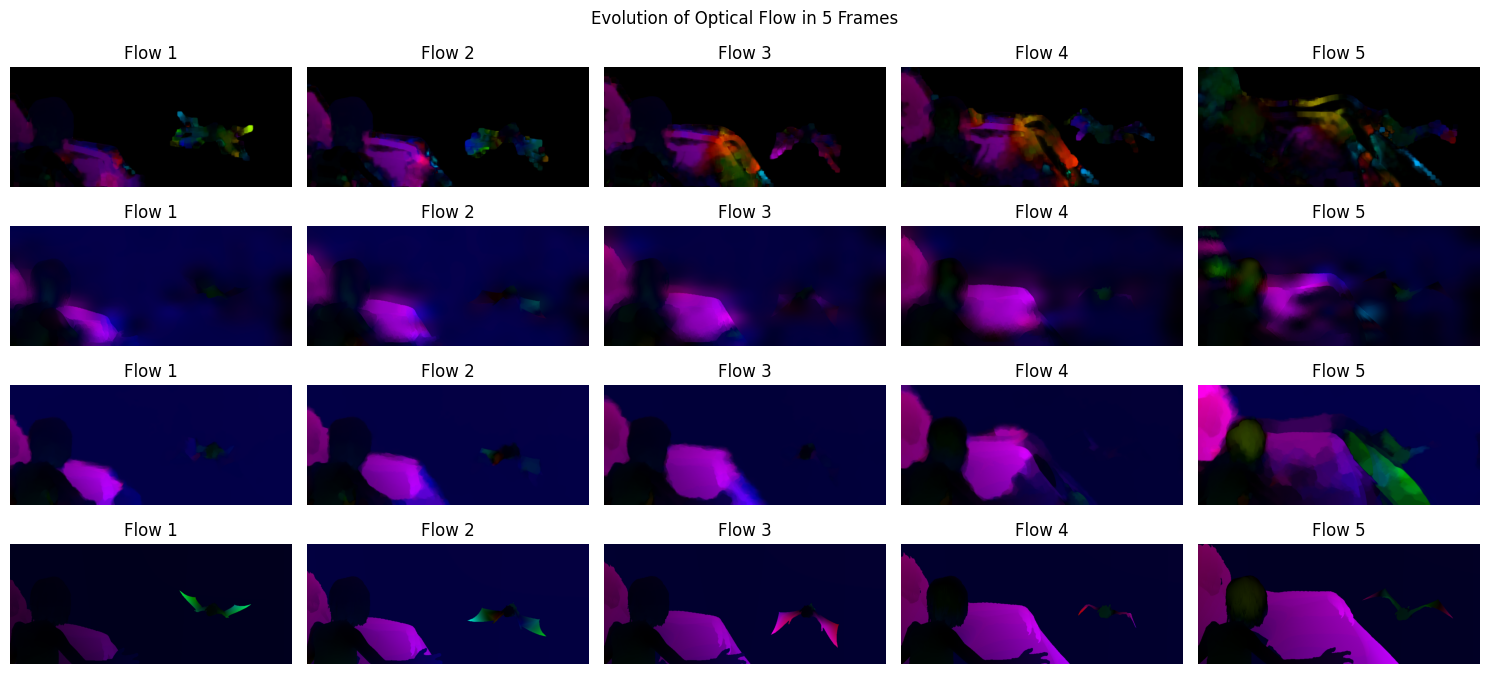

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 5, figsize=(15, 7))

prev_flows = [None, None, None, None]

for row in range(4):
    for col in range(5):
        idx = col + 15
        if idx < len(frames) - 1:
            frame1 = frames[idx]
            frame2 = frames[idx + 1]
            if row == 0:
                flow = farneback_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 1:
                flow = pcaflow_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 2:
                flow = deepflow_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 3:
                flow = gt_flows[idx]
            prev_flows[row] = flow
            axes[row, col].imshow(flow2bgr(flow))
            # axes[row, col].imshow(flow[..., 0], cmap='jet')
            # axes[row, col].imshow(flow)
            axes[row, col].axis('off')
            axes[row, col].set_title(f'Flow {col + 1}')

plt.suptitle('Evolution of Optical Flow in 5 Frames')
plt.tight_layout()
plt.show()

In [35]:
for flow in prev_flows:
    if flow is not None:
        print(flow.shape)
        print(flow.min(), flow.max())
        print()

(436, 1024, 2)
-83.054665 96.317924

(436, 1024, 2)
-52.60539 58.66819

(436, 1024, 2)
-49.715813 36.97062

(436, 1024, 2)
-83.44906 81.16592

